In [1]:
import pandas as pd

orders = pd.read_csv('List of Orders.csv')
details = pd.read_csv('Order Details.csv')
targets = pd.read_csv('Sales target.csv')

print(orders.head())
print(details.head())
print(targets.head())

  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones
  Month of Order Date   Category   Target
0              Apr-18  Furniture  10400.0
1              May-18  Furniture  10500.0
2              Jun-18  Furniture  10600.0
3              Jul-18  Furniture  10800.0
4   

In [2]:
import psycopg2
# Replace with your actual PostgreSQL credentials
conn = psycopg2.connect(
dbname='SQL database.',
user='postgres',
password='your_password', # Change this!
host='localhost',
port='5432'
)
cur = conn.cursor()
print("✅ Connected to the database!")

✅ Connected to the database!


In [3]:
cur.execute("""
CREATE TABLE IF NOT EXISTS list_of_orders (
    "Order ID" TEXT PRIMARY KEY,
    "Order Date" DATE,
    "CustomerName" TEXT,
    "State" TEXT,
    "City" TEXT
);
""")
conn.commit()
print("✅ Table created!")



✅ Table created!


In [6]:
cur.execute("""
CREATE TABLE IF NOT EXISTS order_details (
    "Order ID" TEXT PRIMARY KEY,
    "Amount" NUMERIC,
    "Profit" NUMERIC,
    "Quantity" INTEGER,
    "Category" TEXT,
    "Sub-Category" TEXT
);
""")
conn.commit()
print("✅ Order Details table created!")


✅ Order Details table created!


In [5]:
cur.execute("""
CREATE TABLE IF NOT EXISTS sales_target (
    "Month of Order Date" TEXT,
    "Category" TEXT,
    "Target" NUMERIC
);
""")
conn.commit()
print("✅ Sales target table created!")


✅ Sales target table created!


In [82]:
conn.rollback()

In [20]:
import csv
from datetime import datetime

def empty_to_none(row):
    return [r if r != "" else None for r in row]

def fix_date(date_str):
    try:
        return datetime.strptime(date_str, '%d-%m-%Y').strftime('%Y-%m-%d')
    except Exception:
        return date_str

with open('List of Orders.csv', 'r') as f:
    next(f)
    reader = csv.reader(f)
    for raw_row in reader:
        row = empty_to_none(raw_row)
        if row[1] is not None:
            row[1] = fix_date(row[1])
        # SKIP rows that have None as Order ID (first column)
        if row[0] is not None:
            cur.execute("""
                INSERT INTO list_of_orders (
                    "Order ID", "Order Date", "CustomerName", "State", "City"
                ) VALUES (%s, %s, %s, %s, %s)
                ON CONFLICT ("Order ID") DO NOTHING;
            """, row)

conn.commit()
print("✅ List of Orders.csv data imported with blank rows skipped!")


✅ List of Orders.csv data imported with blank rows skipped!


In [24]:
import csv

def empty_to_none(row):
    return [r if r != "" else None for r in row]

with open('Order Details.csv', 'r') as f:
    next(f)  # skip header
    reader = csv.reader(f)
    for raw_row in reader:
        row = empty_to_none(raw_row)
        # Skip rows with None as Order ID (first column required)
        if row[0] is not None:
            cur.execute("""
                INSERT INTO order_details (
                    "Order ID", "Amount", "Profit", "Quantity", "Category", "Sub-Category"
                ) VALUES (%s, %s, %s, %s, %s, %s);
            """, row)

conn.commit()
print("✅ Order Details.csv data imported!")


✅ Order Details.csv data imported!


In [28]:
import csv

def empty_to_none(row):
    return [r if r != "" else None for r in row]

with open('Sales target.csv', 'r') as f:
    next(f)  # Skip header row
    reader = csv.reader(f)
    for raw_row in reader:
        row = empty_to_none(raw_row)
        cur.execute("""
            INSERT INTO sales_target (
                "Month of Order Date", "Category", "Target"
            ) VALUES (%s, %s, %s)
        """, row)

conn.commit()
print("✅ Sales target CSV data imported!")


✅ Sales target CSV data imported!


In [29]:
import pandas as pd

cur.execute("SELECT * FROM list_of_orders;")  
rows = cur.fetchall()

# Get column names automatically from cursor
colnames = [desc[0] for desc in cur.description]

df = pd.DataFrame(rows, columns=colnames)

print(df)

    Order ID  Order Date CustomerName              State       City
0    B-25601  2018-04-01       Bharat            Gujarat  Ahmedabad
1    B-25602  2018-04-01        Pearl        Maharashtra       Pune
2    B-25603  2018-04-03        Jahan     Madhya Pradesh     Bhopal
3    B-25604  2018-04-03       Divsha          Rajasthan     Jaipur
4    B-25605  2018-04-05      Kasheen        West Bengal    Kolkata
..       ...         ...          ...                ...        ...
495  B-26096  2019-03-28       Atharv        West Bengal    Kolkata
496  B-26097  2019-03-28         Vini          Karnataka  Bangalore
497  B-26098  2019-03-29        Pinky  Jammu and Kashmir    Kashmir
498  B-26099  2019-03-30       Bhishm        Maharashtra     Mumbai
499  B-26100  2019-03-31       Hitika     Madhya Pradesh     Indore

[500 rows x 5 columns]


In [30]:
import pandas as pd

cur.execute("SELECT * FROM order_details;")  
rows = cur.fetchall()

# Get column names automatically from cursor
colnames = [desc[0] for desc in cur.description]

df = pd.DataFrame(rows, columns=colnames)

print(df)

     Order ID   Amount    Profit  Quantity     Category      Sub-Category
0     B-25601  1275.00  -1148.00         7    Furniture         Bookcases
1     B-25601    66.00    -12.00         5     Clothing             Stole
2     B-25601     8.00     -2.00         3     Clothing       Hankerchief
3     B-25601    80.00    -56.00         4  Electronics  Electronic Games
4     B-25602   168.00   -111.00         2  Electronics            Phones
...       ...      ...       ...       ...          ...               ...
1495  B-26099   835.00    267.00         5  Electronics            Phones
1496  B-26099  2366.00    552.00         5     Clothing          Trousers
1497  B-26100   828.00    230.00         2    Furniture            Chairs
1498  B-26100    34.00     10.00         2     Clothing           T-shirt
1499  B-26100    72.00     16.00         2     Clothing             Shirt

[1500 rows x 6 columns]


In [32]:
import pandas as pd

cur.execute("SELECT * FROM sales_target ;")  
rows = cur.fetchall()

# Get column names automatically from cursor
colnames = [desc[0] for desc in cur.description]

df = pd.DataFrame(rows, columns=colnames)

print(df)

   Month of Order Date     Category    Target
0               Apr-18    Furniture  10400.00
1               May-18    Furniture  10500.00
2               Jun-18    Furniture  10600.00
3               Jul-18    Furniture  10800.00
4               Aug-18    Furniture  10900.00
5               Sep-18    Furniture  11000.00
6               Oct-18    Furniture  11100.00
7               Nov-18    Furniture  11300.00
8               Dec-18    Furniture  11400.00
9               Jan-19    Furniture  11500.00
10              Feb-19    Furniture  11600.00
11              Mar-19    Furniture  11800.00
12              Apr-18     Clothing  12000.00
13              May-18     Clothing  12000.00
14              Jun-18     Clothing  12000.00
15              Jul-18     Clothing  14000.00
16              Aug-18     Clothing  14000.00
17              Sep-18     Clothing  14000.00
18              Oct-18     Clothing  16000.00
19              Nov-18     Clothing  16000.00
20              Dec-18     Clothin

In [38]:
cur.execute("""
    SELECT 
        EXTRACT(YEAR FROM lo."Order Date") AS year,
        EXTRACT(MONTH FROM lo."Order Date") AS month,
        SUM(od."Amount") AS total_sales
    FROM list_of_orders lo
    JOIN order_details od ON lo."Order ID" = od."Order ID"
    GROUP BY year, month
    ORDER BY year, month;
""")
rows = cur.fetchall()

# Get column names automatically from cursor
colnames = [desc[0] for desc in cur.description]

df = pd.DataFrame(rows, columns=colnames)

print(df)


    year month total_sales
0   2018     4    32726.00
1   2018     5    28545.00
2   2018     6    23658.00
3   2018     7    12966.00
4   2018     8    30899.00
5   2018     9    26628.00
6   2018    10    31615.00
7   2018    11    48086.00
8   2018    12    37579.00
9   2019     1    61439.00
10  2019     2    38424.00
11  2019     3    58937.00


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine year and month into 'year_month' for neat x-axis labels
df['year_month'] = df['year'].astype(int).astype(str) + '-' + df['month'].astype(int).astype(str).str.zfill(2)
df = df.sort_values(by=['year', 'month'])


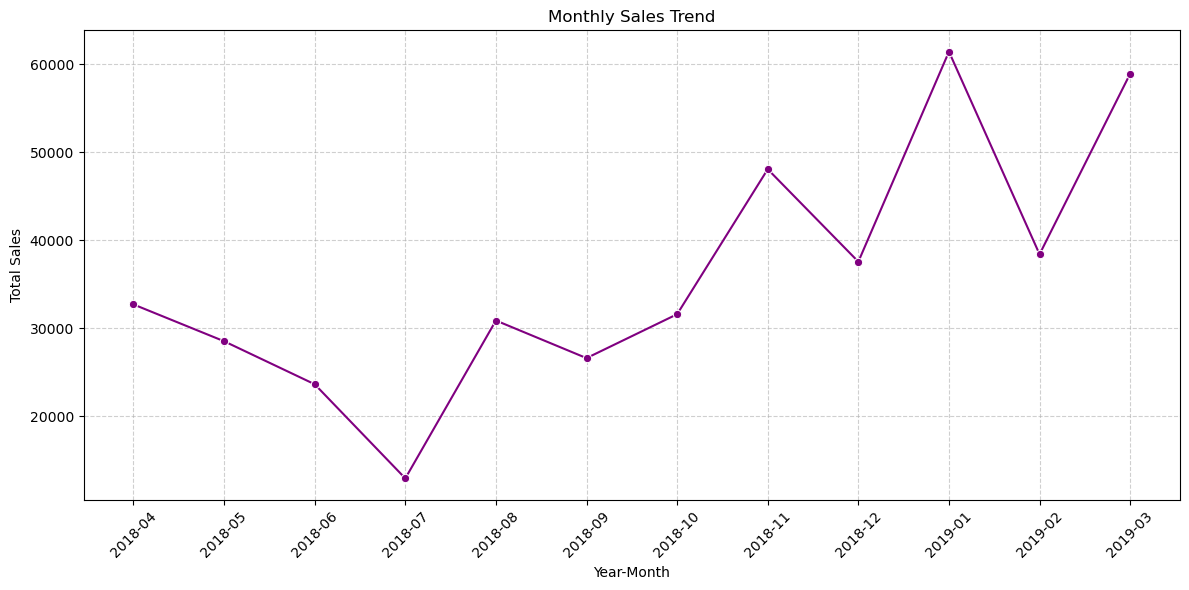

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='total_sales', data=df, marker="o", color="purple")
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True, which='major', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [70]:
cur.execute("""
    SELECT 
      "Category",
        SUM("Quantity") AS total_quantity,
        SUM("Profit") AS total_profit   
    FROM order_details 
    GROUP BY "Category"
    ORDER BY total_profit DESC      
    
""")
rows = cur.fetchall()

# Get column names automatically from cursor
colnames = [desc[0] for desc in cur.description]

df = pd.DataFrame(rows, columns=colnames)

print(df)

      Category  total_quantity total_profit
0     Clothing            3516     11163.00
1  Electronics            1154     10494.00
2    Furniture             945      2298.00


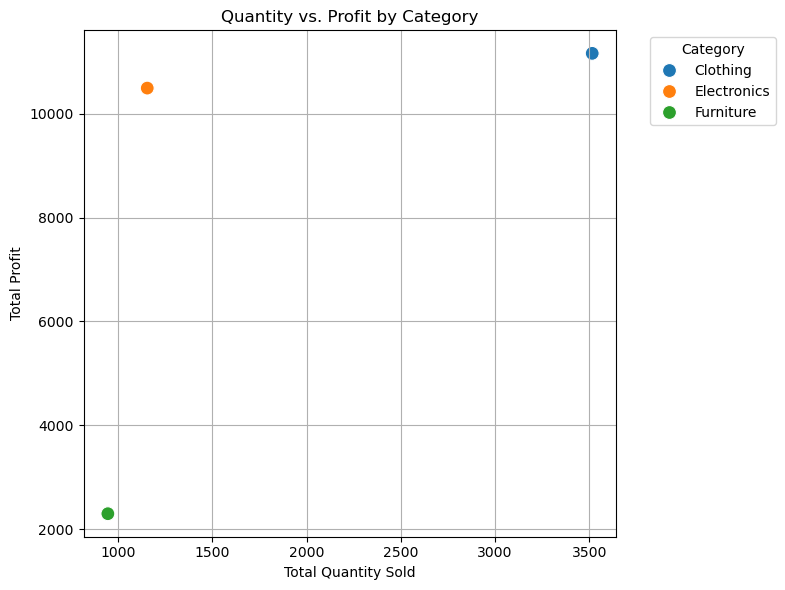

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="total_quantity",
    y="total_profit",
    hue="Category",         # Color by category
    s=100,
)

plt.xlabel("Total Quantity Sold")
plt.ylabel("Total Profit")
plt.title("Quantity vs. Profit by Category")
plt.grid(True)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [78]:
cur.execute("""
    SELECT 
        "Sub-Category",
        SUM("Quantity") AS total_quantity,
        SUM("Profit") AS total_profit   
    FROM order_details 
    GROUP BY "Sub-Category"
    ORDER BY total_profit DESC      
""")
rows = cur.fetchall()

# Get column names automatically from cursor
colnames = [desc[0] for desc in cur.description]

df = pd.DataFrame(rows, columns=colnames)

print(df)


        Sub-Category  total_quantity total_profit
0           Printers             291      5964.00
1          Bookcases             297      4888.00
2        Accessories             262      3559.00
3           Trousers             135      2847.00
4              Stole             671      2559.00
5             Phones             304      2207.00
6        Hankerchief             754      2098.00
7            T-shirt             305      1500.00
8              Shirt             271      1131.00
9        Furnishings             310       844.00
10            Chairs             277       577.00
11             Saree             782       352.00
12          Leggings             186       260.00
13             Skirt             248       235.00
14             Kurti             164       181.00
15  Electronic Games             297     -1236.00
16            Tables              61     -4011.00


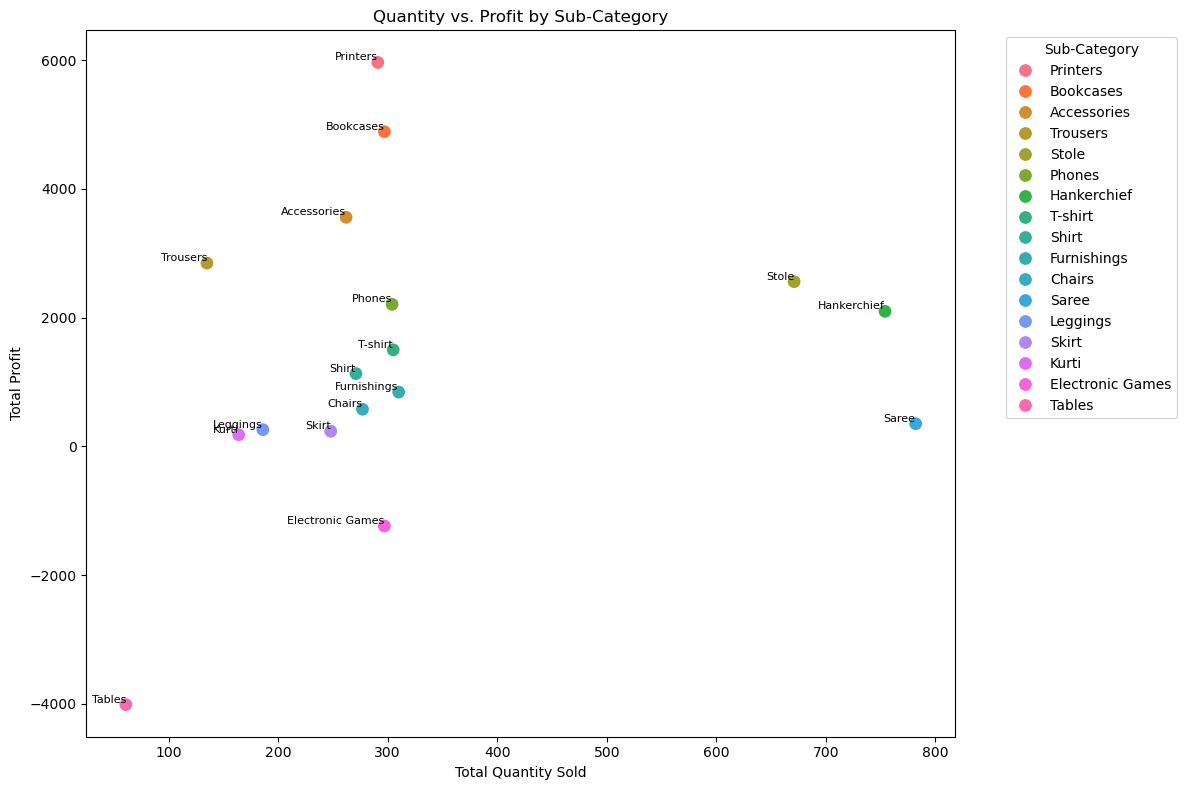

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="total_quantity",
    y="total_profit",
    hue="Sub-Category",      # color points by sub-category
    s=100
)

# Label each point with sub-category name
for i, row in df.iterrows():
    plt.text(
        row["total_quantity"],
        row["total_profit"],
        row["Sub-Category"],
        fontsize=8,
        ha="right",
        va="bottom"
    )

plt.xlabel("Total Quantity Sold")
plt.ylabel("Total Profit")
plt.title("Quantity vs. Profit by Sub-Category")
plt.legend(title="Sub-Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [86]:
conn.rollback()